# Rifaccio rd regressione 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy.stats as stats

In [16]:
DATAPATH = './data/auto-mpg-regression/dataset.tsv'
data = pd.read_csv(DATAPATH, sep='\t')
data.head()

,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [17]:
data = pd.read_csv(DATAPATH, sep='\t',header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [18]:
columns = ['mpg','cylinder','displacement', 'horsepower','weight','acceleration', 'model_year','origin','car name']
data = pd.read_csv(DATAPATH, sep='\t',header=None, names=columns)
data.head()

,mpg,cylinder,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [19]:
data.describe(include='all')

,mpg,cylinder,displacement,horsepower,weight,acceleration,model_year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


> Qua non vedo duplicati quindi passo all'analisi dei NaN

In [20]:
data.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [21]:
data = pd.read_csv(DATAPATH, sep='\t',header=None, names=columns, na_values={'horsepower':'?'})
data.describe(include='all')


,mpg,cylinder,displacement,horsepower,weight,acceleration,model_year,origin,car name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,NaN


In [22]:
#Ho valori nulli 
data.horsepower.fillna(data.horsepower.median(),inplace=True)

In [23]:
data.describe(include='all')

,mpg,cylinder,displacement,horsepower,weight,acceleration,model_year,origin,car name
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,NaN


c:\Users\lucar\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\lucar\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\lucar\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\lucar\miniconda3\li

<AxesSubplot:xlabel='weight'>

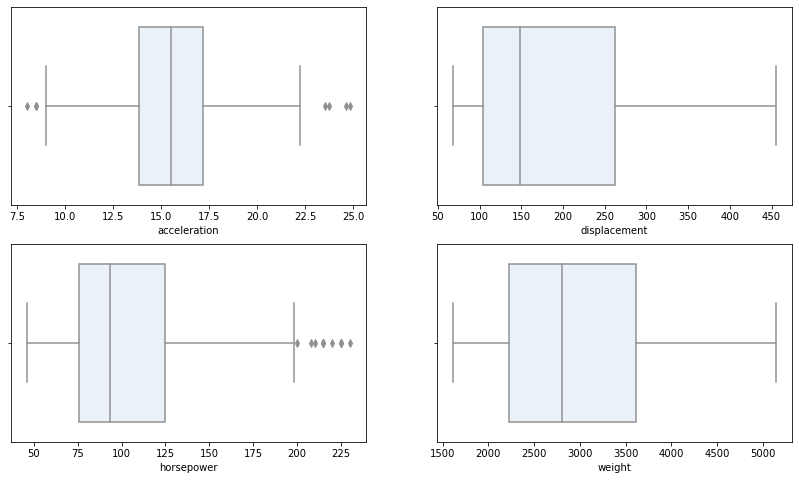

In [30]:
pal = sns.color_palette("Blues", 12)
sns.set_palette(pal)
fig,axs= plt.subplots(2,2,figsize=(14,8))

sns.boxplot(data.acceleration, ax=axs[0,0])
sns.boxplot(data.displacement, ax=axs[0,1])
sns.boxplot(data.horsepower, ax=axs[1,0])
sns.boxplot(data.weight, ax=axs[1,1])

In [ ]:
stats.mstats.winsorize(data.acceleration,limits=0.05,inplace=True)
stats.mstats.winsorize(data.horsepower,limits=0.05,inplace=True)

masked_array(data=[130. , 165. , 150. , 150. , 140. , 180. , 180. , 180. ,
                   180. , 180. , 170. , 160. , 150. , 180. ,  95. ,  95. ,
                    97. ,  85. ,  88. ,  60. ,  87. ,  90. ,  95. , 113. ,
                    90. , 180. , 180. , 180. , 180. ,  88. ,  90. ,  95. ,
                    93.5, 100. , 105. , 100. ,  88. , 100. , 165. , 175. ,
                   153. , 150. , 180. , 170. , 175. , 110. ,  72. , 100. ,
                    88. ,  86. ,  90. ,  70. ,  76. ,  65. ,  69. ,  60. ,
                    70. ,  95. ,  80. ,  60. ,  90. ,  86. , 165. , 175. ,
                   150. , 153. , 150. , 180. , 155. , 160. , 180. ,  97. ,
                   150. , 130. , 140. , 150. , 112. ,  76. ,  87. ,  69. ,
                    86. ,  92. ,  97. ,  80. ,  88. , 175. , 150. , 145. ,
                   137. , 150. , 180. , 150. , 158. , 150. , 180. , 180. ,
                   175. , 105. , 100. , 100. ,  88. ,  95. ,  60. , 150. ,
                   167. ,

c:\Users\lucar\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

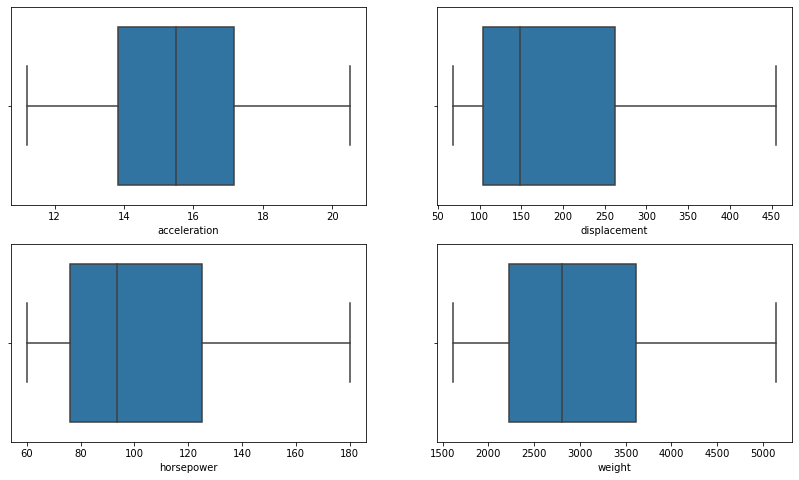

In [ ]:
fig,axs= plt.subplots(2,2,figsize=(14,8))
sns.boxplot(x=data.acceleration, ax=axs[0,0])
sns.boxplot(data.displacement, ax=axs[0,1])
sns.boxplot(x=data.horsepower, ax=axs[1,0])
sns.boxplot(x=data.weight, ax=axs[1,1])

In [ ]:
categorical_features=['cylinder','model_year','origin']
data_with_dummies= pd.get_dummies(data,columns=categorical_features)

columns= data_with_dummies.columns.to_list()
columns.insert(len(columns),columns.pop(columns.index('mpg')))
data_with_dummies = data_with_dummies.loc[:, columns]
data_with_dummies.head()

,displacement,horsepower,weight,acceleration,car name,cylinder_3,cylinder_4,cylinder_5,cylinder_6,cylinder_8,...,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82,origin_1,origin_2,origin_3,mpg
0,307.0,130.0,3504.0,12.0,chevrolet chevelle malibu,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,18.0
1,350.0,165.0,3693.0,11.5,buick skylark 320,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,15.0
2,318.0,150.0,3436.0,11.2,plymouth satellite,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,18.0
3,304.0,150.0,3433.0,12.0,amc rebel sst,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,16.0
4,302.0,140.0,3449.0,11.2,ford torino,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,17.0


In [ ]:
data_with_dummies['automaker_name'] = data_with_dummies['car name'].map(lambda x: x.split(' ')[0] )